In [216]:
#Code for drug persistency project 
# Merged code from the Data Glacier Data Dynamo Group: Jen Turley, Queen Echerenwa, Ateeb Aquil
import pandas as pd
import numpy as np

#the initial dataset was converted to csv within excel to eliminate the cover page (only the data page is needed)
#health = pd.read_csv('r'C:\Users\jenni\Documents\DataGlacier\'Healthcare_dataset.csv')
health = pd.read_csv('/Users/jen/Documents/GitHub/GroupProject/Healthcare_dataset.csv')


########################################
#Begin data cleansing and transformation
########################################

#Create an ordered age category -more useful than the provided unordered buckets for age
Age_Cat = list()

for i in range(0,3424):
    if health['Age_Bucket'][i] == '<55':
        Age_Cat.append(0)
    if health['Age_Bucket'][i] == '55-65':
        Age_Cat.append(1)
    if health['Age_Bucket'][i] == '65-75':
        Age_Cat.append(2)
    if health['Age_Bucket'][i] == '>75':
        Age_Cat.append(3)
    


health.insert(6, "Age_Category", Age_Cat, True)
#health.head()

In [217]:
#check the balance of the data between persistent and non-persistent (the target variable)
health['Persistency_Flag'].value_counts()

#the data is unbalanced between the two possible values for Persistency_Flag - this will be dealt with later when applying the ML classification algorithm


Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [218]:

#correct a problem with a column name-- One column has a comma in the middle of its name which interferes with use of that col, remove the comma:
health=health.rename(columns = {'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'})


In [219]:
#correct the entry with the odd version of OB GYN name on specialities field
print(health.index[health['Ntm_Speciality'] == 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'])
health.set_value(2847,'Ntm_Speciality','OBSTETRICS & GYNECOLOGY')
print(health['Ntm_Speciality'][2847])

Int64Index([2847], dtype='int64')
OBSTETRICS & GYNECOLOGY


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
import matplotlib.pyplot as plt
#set a parameter for plotting bar charts
plt.rc('font', size = 12)


3    1439
2    1086
1     733
0     166
Name: Age_Category, dtype: int64

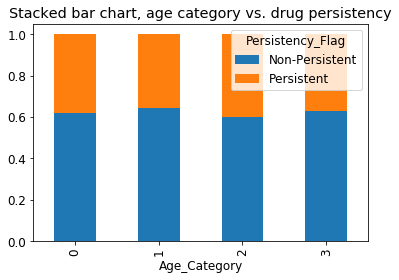

In [221]:
#Create Bar Charts to do a visual assessment of the relationships between predictor variables (individually) against the target 'Persistency_Flag' variable
#Even if the bar chart indicates a relationship, if the numbers are too skewed it might not be very helpful, therefore also printing value counts for indep vars


table = pd.crosstab(health.Age_Category, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, age category vs. drug persistency')
#age category does not seem a strong predictor for drug persistency
health['Age_Category'].value_counts()

#No evident information from this independent variable (it sheds little or no light on persistency based on the bar chart)

In [222]:
#Now to check all the variables:
#first create list for demographic variables
#then create lists for clinical variables

#including age_category and not the other, age_bucket
list1 = health.columns[3:8]
list2 = health.columns[9:12]
demographic = list1.to_list() + list2.to_list() #the produced list1, list2 were series so I converted to list format



#I similarly created three clinical lists
list3 = health.columns[12:26]
clinical1 = list3.to_list()
list4 = health.columns[26:50]
clinical2 = list4.to_list()
list5 = health.columns[50:71]
clinical3 = list5.to_list()


Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
---
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
---
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
---
3    1439
2    1086
1     733
0     166
Name: Age_Category, dtype: int64
---
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
---
Others        2013
Specialist    1411
Name: Ntm_Specialist_Flag, dtype: int64
---
OB/GYN/Others/PCP/Unknown    2104
Endo/Onc/Uro                  716
Rheum                         604
Name: Ntm_Speciality_Bucket, dtype: int64
---
N    2619
Y     805
Name: Gluco_Record_Prior_Ntm, dtype: int64
---


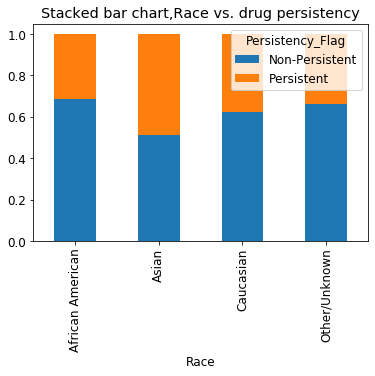

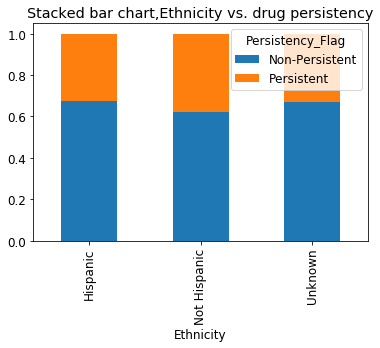

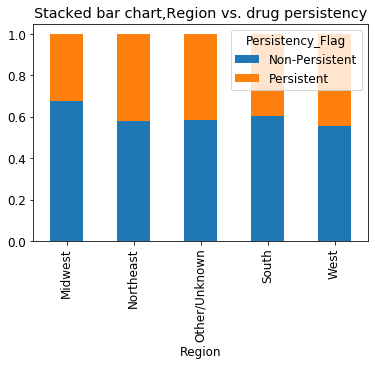

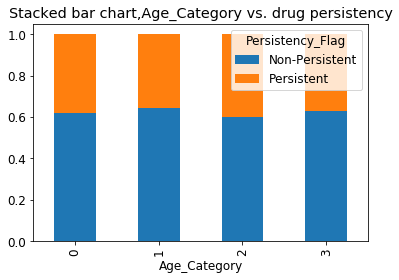

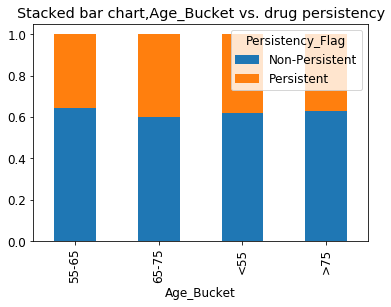

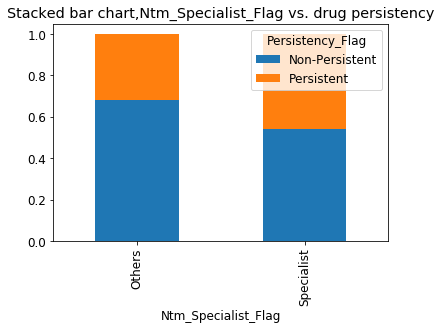

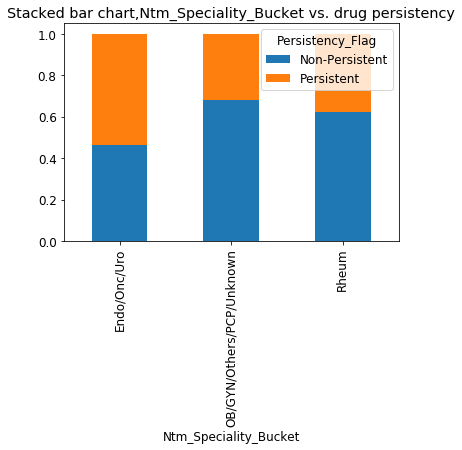

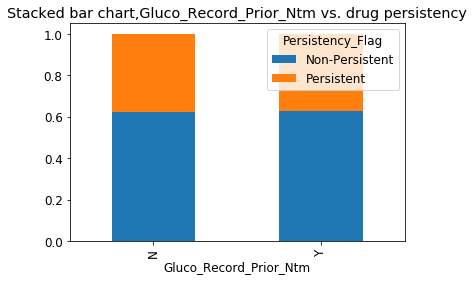

In [223]:
#using a loop, look at all the independent demographic variables against the dependent variable drug persistency
for item in demographic:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')
    

N    2522
Y     902
Name: Gluco_Record_During_Rx, dtype: int64
---
0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
17        7
30        7
21        7
28        7
36        5
19        3
32        3
34        3
42        3
25        2
39        2
58        2
52        2
48        2
88        2
38        1
81        1
40        1
146       1
45        1
37        1
35        1
33        1
29        1
27        1
23        1
118       1
44        1
110       1
108       1
72        1
68        1
69        1
54        1
50        1
66        1
Name: Dexa_Freq_During_Rx, dtype: int64
---
N    2488
Y     936
Name: Dexa_During_Rx, dtype: int64
---
N    2872
Y     552
Name: Frag_Frac_Prior_Ntm, dtype: int64
---
N    3007
Y     417
Name: Frag_Frac_During_Rx, dtype: int64
---
VLR_LR

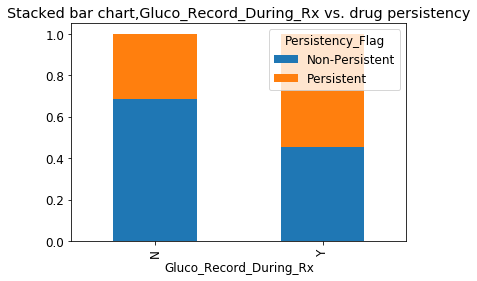

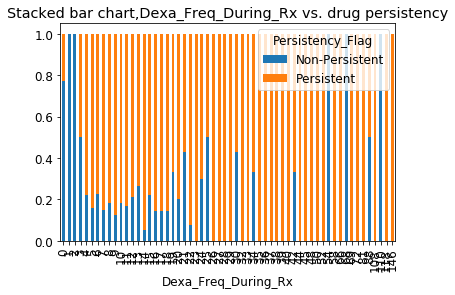

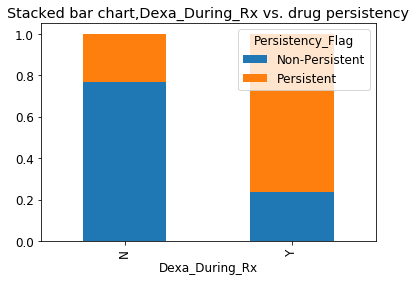

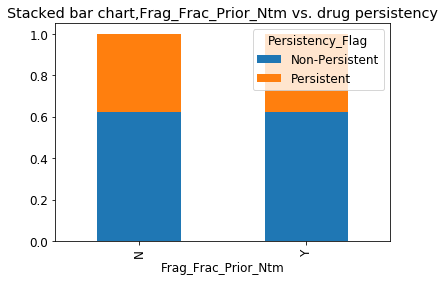

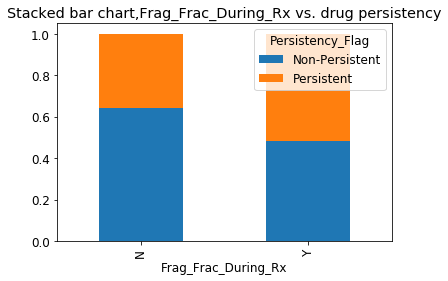

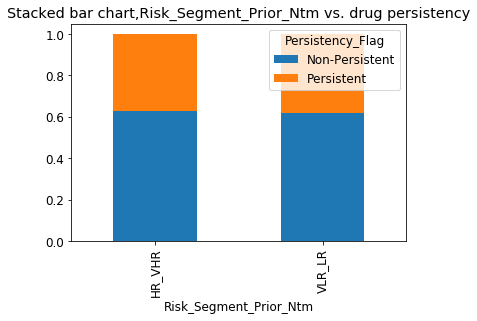

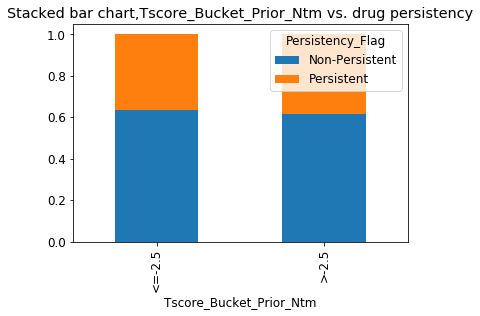

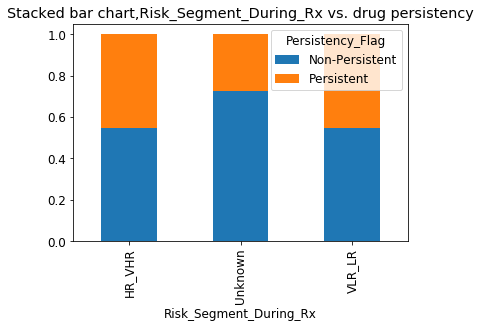

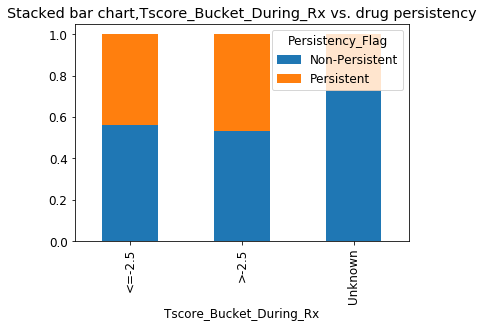

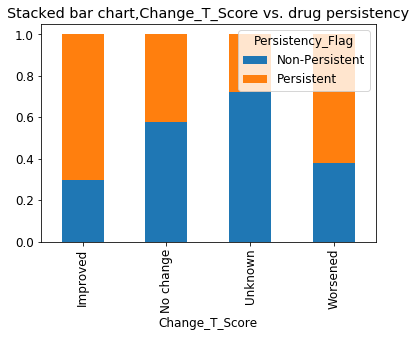

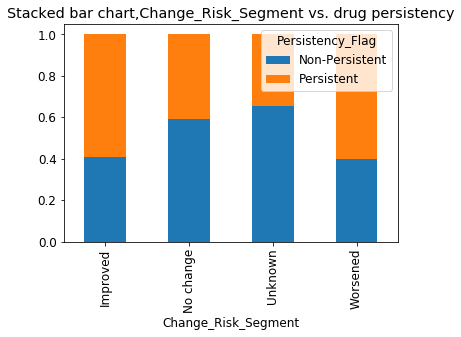

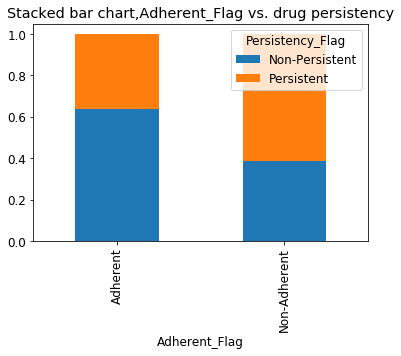

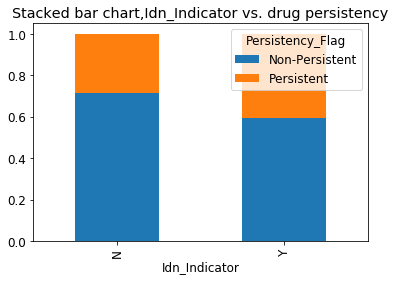

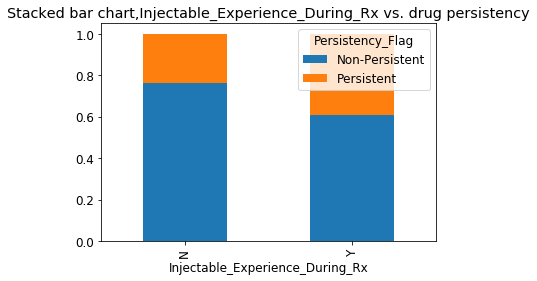

In [224]:
#look at the first list of clinical variables against the dependent variable drug persistency

for item in clinical1:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')

N    1891
Y    1533
Name: Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, dtype: int64
---
N    1911
Y    1513
Name: Comorb_Encounter_For_Immunization, dtype: int64
---
N    2072
Y    1352
Name: Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx, dtype: int64
---
N    2331
Y    1093
Name: Comorb_Vitamin_D_Deficiency, dtype: int64
---
N    2425
Y     999
Name: Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, dtype: int64
---
N    2633
Y     791
Name: Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, dtype: int64
---
N    2607
Y     817
Name: Comorb_Long_Term_Current_Drug_Therapy, dtype: int64
---
N    2645
Y     779
Name: Comorb_Dorsalgia, dtype: int64
---
N    2747
Y     677
Name: Comorb_Personal_History_Of_Other_Diseases_And_Conditions, dtype: int64
---
N    2906
Y     518
Name: Comorb_Other_Disorders_Of_Bone_Density_And_Structure, dtype: int64
---
Y    1765
N    1659
Name: Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias, dtyp

/Users/jen/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


N    3071
Y     353
Name: Concom_Viral_Vaccines, dtype: int64
---


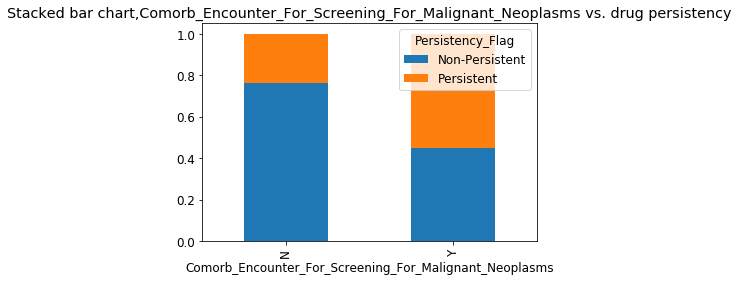

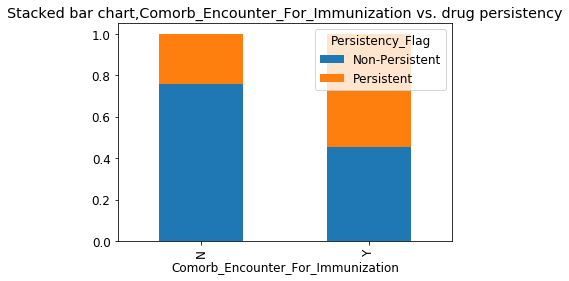

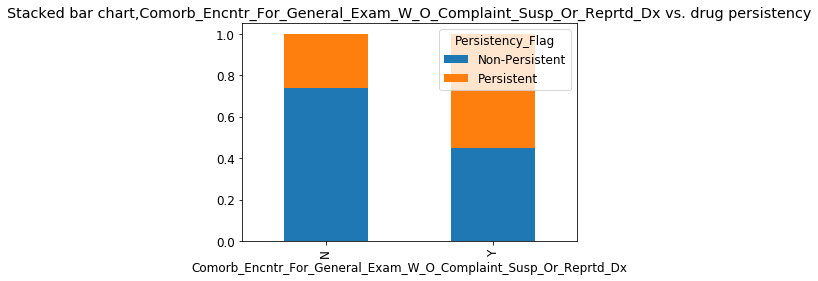

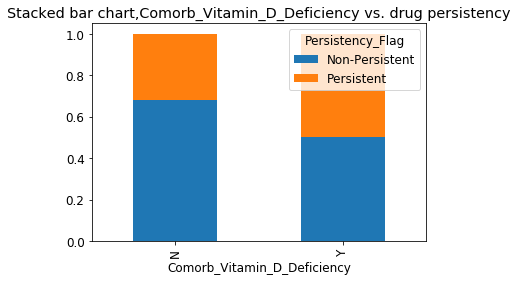

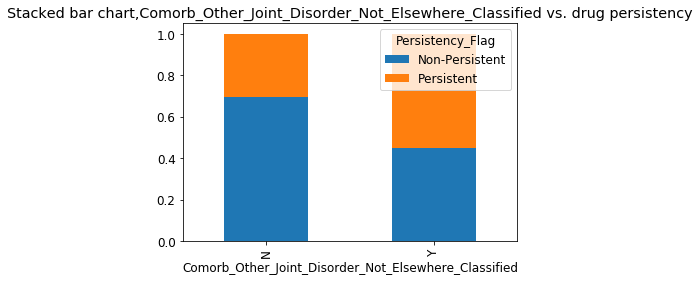

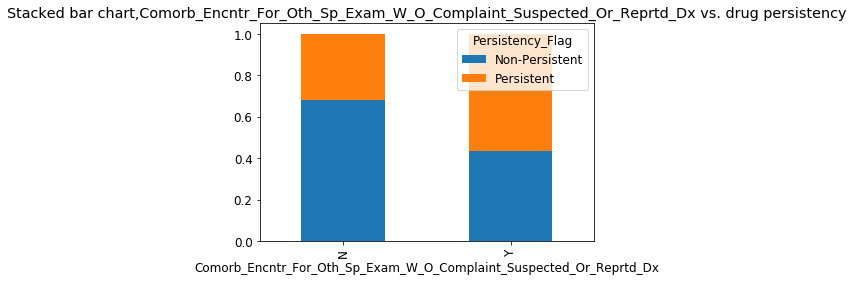

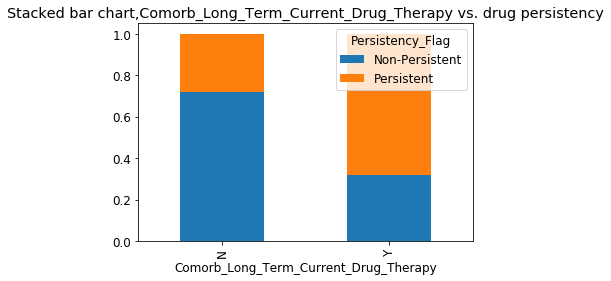

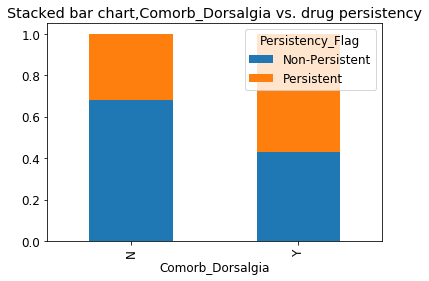

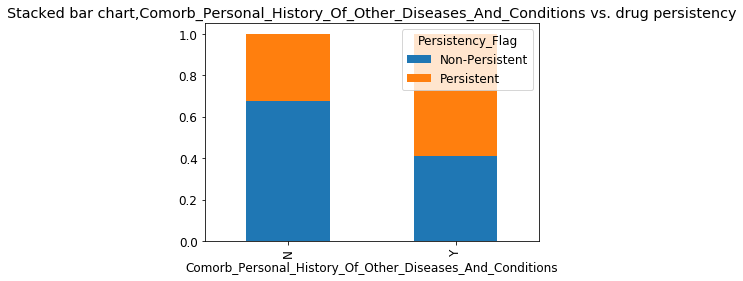

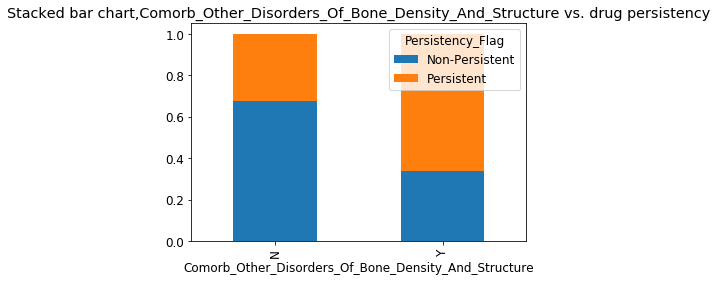

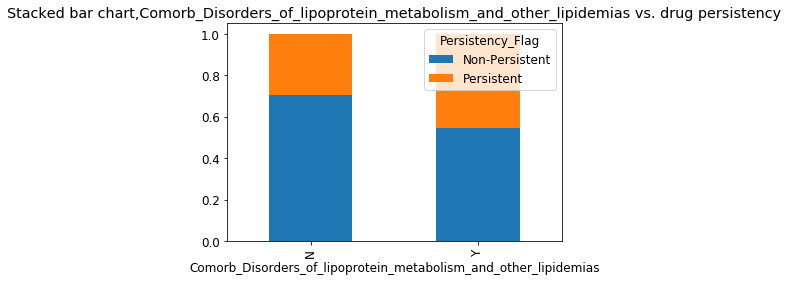

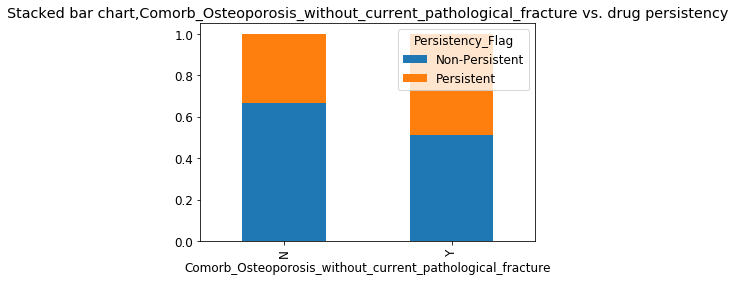

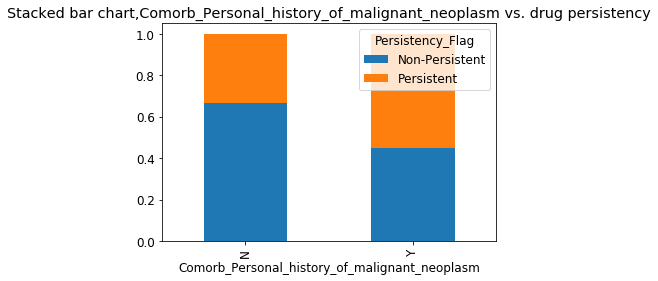

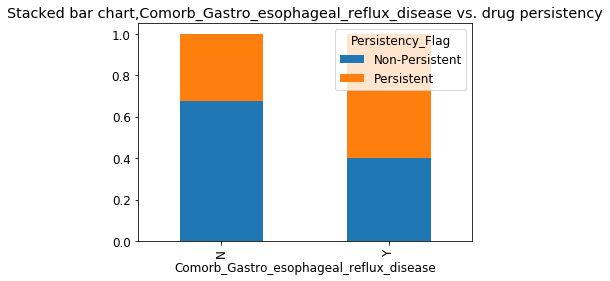

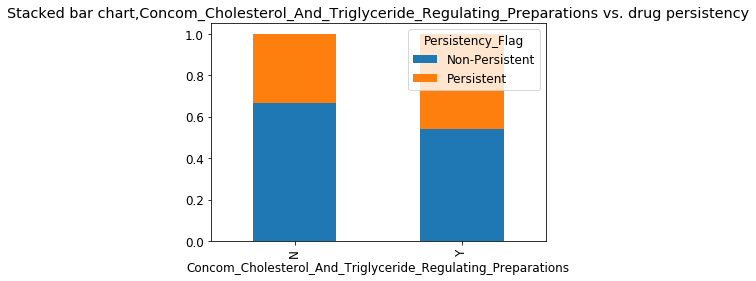

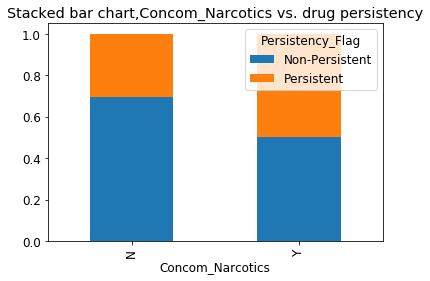

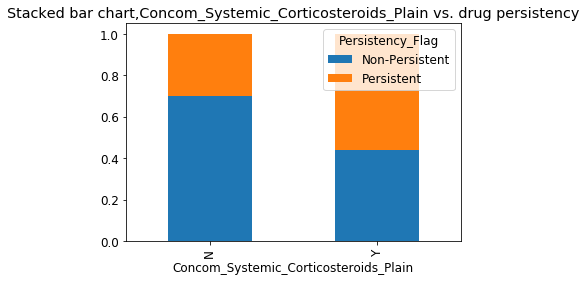

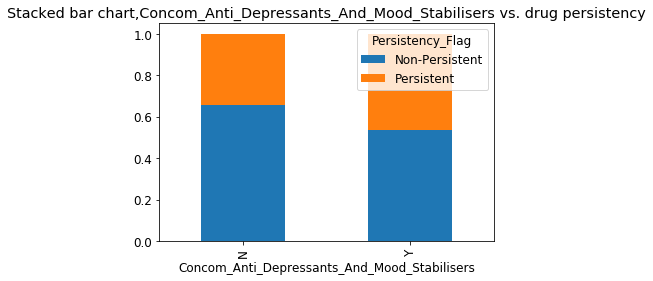

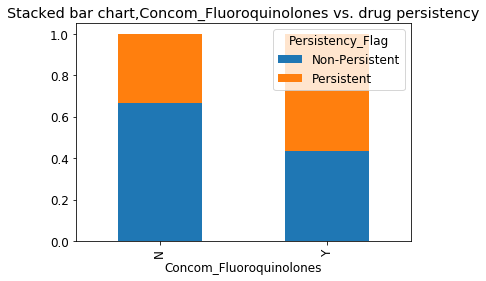

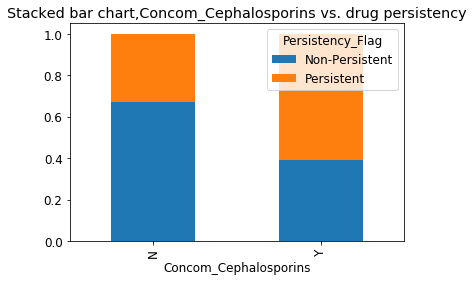

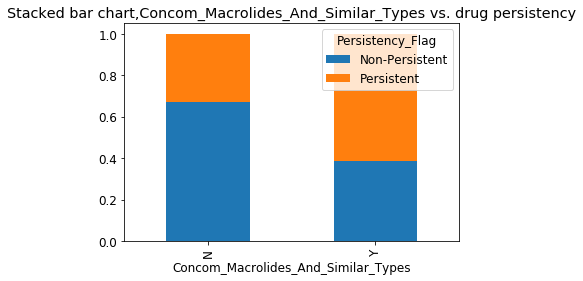

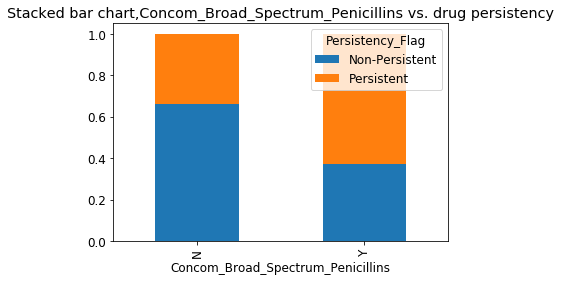

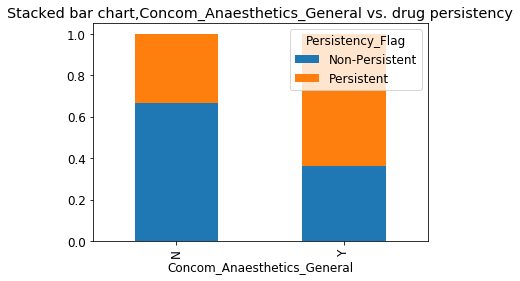

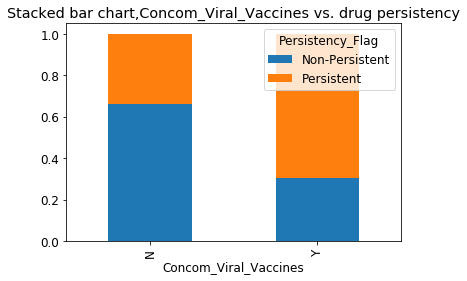

In [225]:
#look at indep vars in second clinical group in same manner

for item in clinical2:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')

N    3285
Y     139
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64
---
N    3421
Y       3
Name: Risk_Osteogenesis_Imperfecta, dtype: int64
---
N    3294
Y     130
Name: Risk_Rheumatoid_Arthritis, dtype: int64
---
N    3422
Y       2
Name: Risk_Untreated_Chronic_Hyperthyroidism, dtype: int64
---
N    3297
Y     127
Name: Risk_Untreated_Chronic_Hypogonadism, dtype: int64
---
N    3412
Y      12
Name: Risk_Untreated_Early_Menopause, dtype: int64
---
N    3168
Y     256
Name: Risk_Patient_Parent_Fractured_Their_Hip, dtype: int64
---
N    2780
Y     644
Name: Risk_Smoking_Tobacco, dtype: int64
---
N    2954
Y     470
Name: Risk_Chronic_Malnutrition_Or_Malabsorption, dtype: int64
---
N    3406
Y      18
Name: Risk_Chronic_Liver_Disease, dtype: int64
---
N    3066
Y     358
Name: Risk_Family_History_Of_Osteoporosis, dtype: int64
---
N    3382
Y      42
Name: Risk_Low_Calcium_Intake, dtype: int64
---
N    1788
Y    1636
Name: Risk_Vitamin_D_Insufficiency, dtype: int64
---
N    323

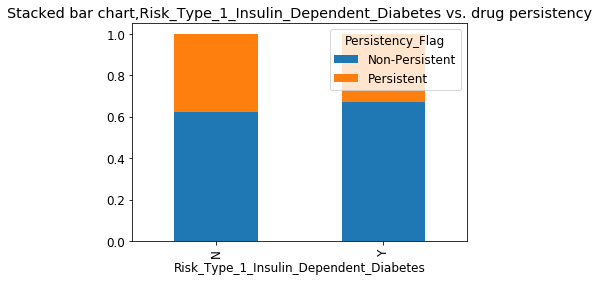

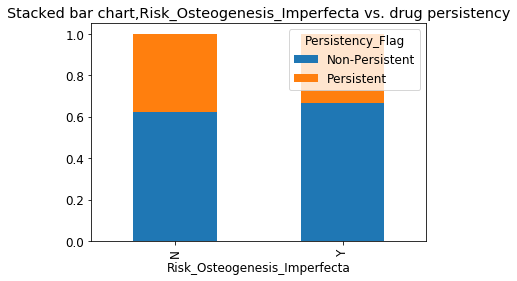

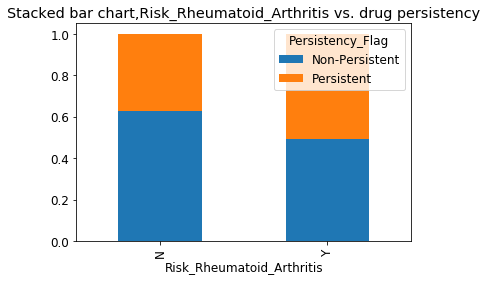

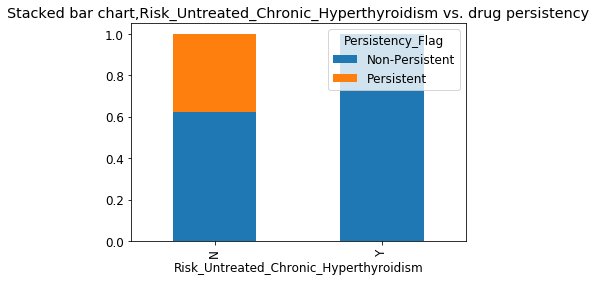

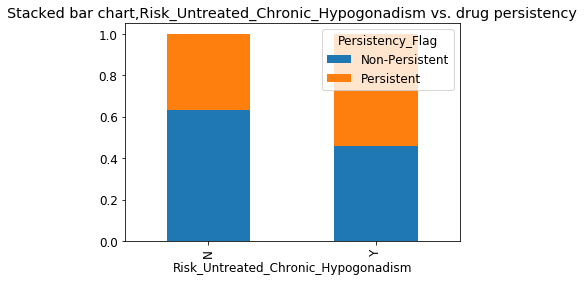

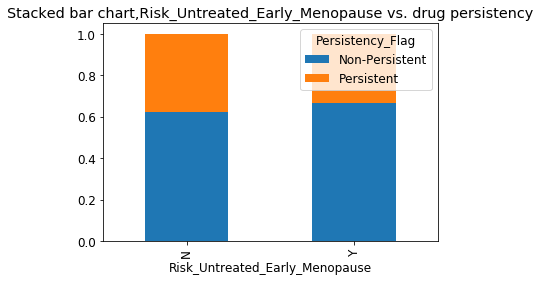

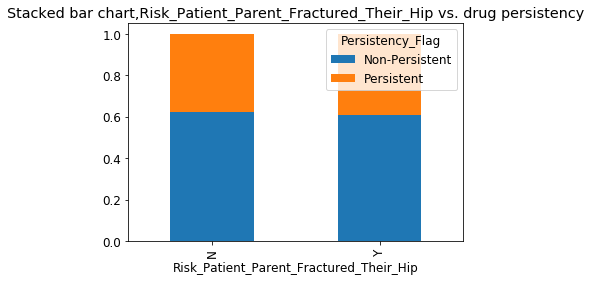

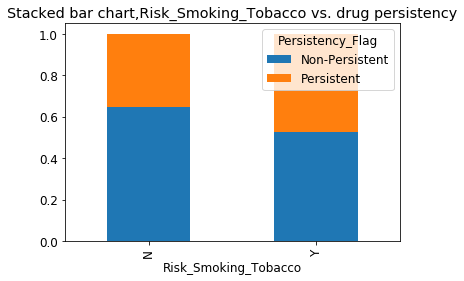

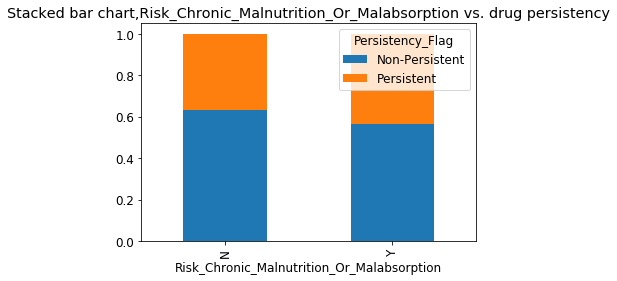

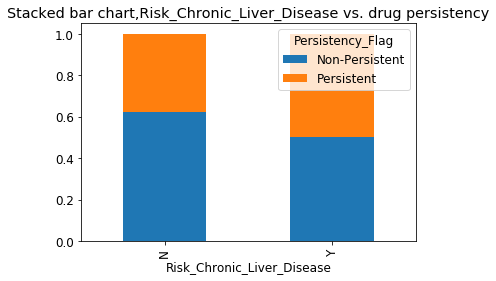

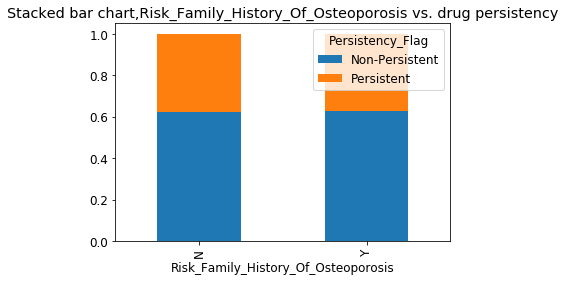

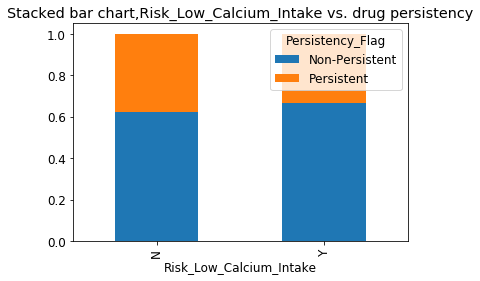

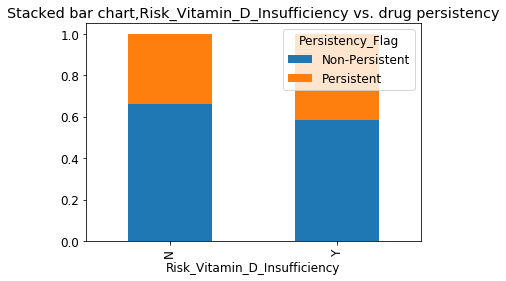

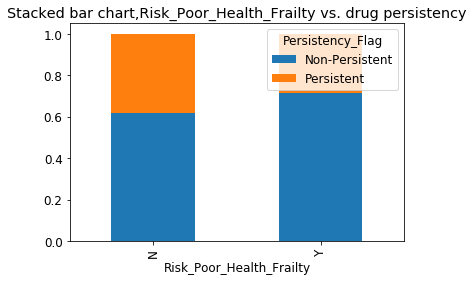

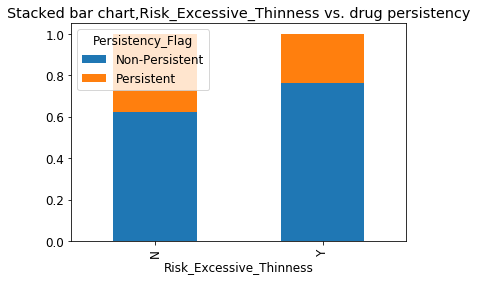

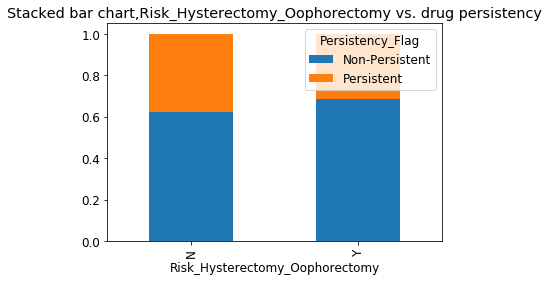

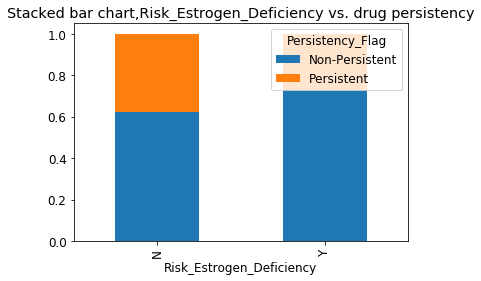

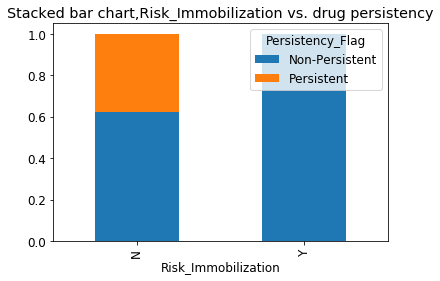

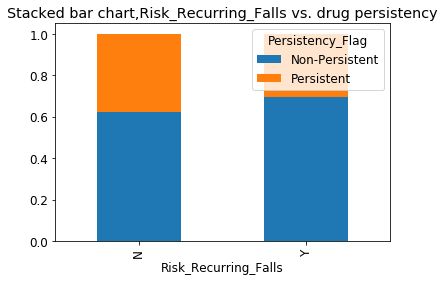

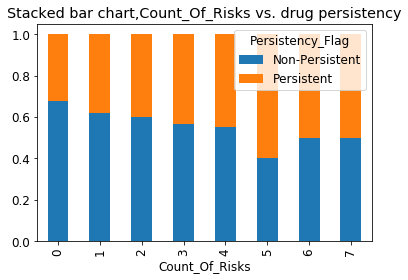

In [226]:
#do the same for the third clinical group

for item in clinical3:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')

In [227]:
#Create some new columns with different buckets (more useful, based on bar chart visualizations)
#create a column that flags when the value of Dexa_Freq_During_Rx is <=2  - these are disproportionately non-persistent
#this will become a new column for classification purposes
Dexa_Freq_During_Rx_Bucket_Flag = list()
for i in range(0,3424):
    result = 0
    if health['Dexa_Freq_During_Rx'][i] <= 2:
        result = 1
    Dexa_Freq_During_Rx_Bucket_Flag.append(result)
    


#insert new column that flags values for DexaFreqDuringRx associated with non-persistence
health.insert(15, 'Dexa_Freq_During_Rx_Bucket_Flag', Dexa_Freq_During_Rx_Bucket_Flag, True)


#insert a new column that flags Ntm Specialities with high rates of non-persistence
#this will become a new column for classification purposes
Ntm_Speciality_MyBuckets1 = list()
for i in range(0,3424):
    result = 0
    if health['Ntm_Speciality'][i] in ['ONCOLOGY', 'PEDIATRICS', 'PATHOLOGY', 'ENDOCRINOLOGY','VASCULAR SURGERY', 'HOSPICE AND PALLIATIVE MEDICINE', 'NEPHROLOGY', 'NEUROLOGY', 'NUCLEAR MEDICINE', 'PSYCHIATRY AND NEUROLOGY', 'PLASTIC SURGERY', 'RADIOLOGY']:
        result = 1
    Ntm_Speciality_MyBuckets1.append(result)
    
health.insert(11, 'Ntm_Speciality_MyBuckets1', Ntm_Speciality_MyBuckets1, True)


Ntm_Speciality_MyBuckets2 = list()
for i in range(0,3424):
    result = 0
    if health['Ntm_Speciality'][i] in ['PAIN MEDICINE', 'ORTHOPEDIC SURGERY', 'PULMONARY MEDICINE', 'CARDIOLOGY', 'SURGERY AND SURGICAL SPECIALITIES', 'TRANSPLANT SURGERY', 'UROLOGY', 'EMERGENCY MEDICINE','HOSPITAL MEDICINE', 'OPTHALMOLOGY', 'OTOLARYNGOLOGY','PODIATRY', 'CLINICAL NURSE SPECIALIST']:
        result = 1
    Ntm_Speciality_MyBuckets2.append(result)
    
health.insert(11, 'Ntm_Speciality_MyBuckets2', Ntm_Speciality_MyBuckets2, True)

Midwest_Flag = list()
for i in range(0,3424):
    result = 0
    if health['Region'][i] == 'Midwest':
        result = 1
    if health['Region'][i] != 'Midwest':
        result = 0
    Midwest_Flag.append(result)
    
health.insert(7,'Midwest_Flag', Midwest_Flag, True)

AsianRace_Flag = list()
for i in range(0,3424):
    result = 0
    if health['Race'][i] == 'Asian':
        result = 1
    if health['Race'][i] != 'Asian':
        result = 0
    AsianRace_Flag.append(result)
    
health.insert(5,'AsianRace_Flag', AsianRace_Flag, True)


AAmericanRace_Flag = list()
for i in range(0,3424):
    result = 0
    if health['Race'][i] == 'African American':
        result = 1
    if health['Race'][i] != 'African American':
        result = 0
    AAmericanRace_Flag.append(result)
print('AAmericanRace_Flag')
print(AAmericanRace_Flag[0:20])
    
health.insert(5,'AAmericanRace_Flag', AAmericanRace_Flag, True)
print(health['AAmericanRace_Flag'])



ChangedTScore_Worsened = list()
ChangedTScore_Improved = list()
ChangedTScore_Unk = list()

for i in range(0,3424):
    resultw = 0
    resulti = 0
    resultu = 0
    if health['Change_T_Score'][i] == 'Worsened':
        resultw = 1
    if health['Change_T_Score'][i] == 'Improved':
        resulti = 1
    if health['Change_T_Score'][i] == 'Unknown':
        resultu = 1
    ChangedTScore_Worsened.append(resultw)
    ChangedTScore_Improved.append(resulti)
    ChangedTScore_Unk.append(resultu)
    
    
health.insert(15,'ChangedTScore_Worsened', ChangedTScore_Worsened, True)
health.insert(15,'ChangedTScore_Improved', ChangedTScore_Improved, True)
health.insert(15,'ChangedTScore_Unk', ChangedTScore_Unk, True)
print('orig T score')
print(health['Change_T_Score'][0:10])
print(ChangedTScore_Worsened[0:10])
print(ChangedTScore_Improved[0:10])
print(ChangedTScore_Unk[0:10])



Change_RiskSeg_Worsened = list()
Change_RiskSeg_Improved = list()
Change_RiskSeg_Unk = list()


#the new created columns will be added to features below and corresponding earlier columns omitted
#'Dexa_Freq_During_Rx_Bucket_Flag','Change_RiskSeg_Worsened','Change_RiskSeg_Improved', 'Change_RiskSeg_Unk' , 'ChangedTScore_Worsened', 'ChangedTScore_Improved', 'ChangedTScore_Unk', 'AsianRaceFlag', 'Midwest_Flag', 

#in the following two sections of code, the no change cat is default so has no flag


for i in range(0,3424):
    resultw = 0
    resulti = 0
    resultu = 0
    if health['Change_Risk_Segment'][i] == 'Worsened':
        resultw = 1
    if health['Change_Risk_Segment'][i] == 'Improved':
        resulti = 1
    if health['Change_Risk_Segment'][i] == 'Unknown':
        resultu = 1
    Change_RiskSeg_Worsened.append(resultw)
    Change_RiskSeg_Improved.append(resulti)
    Change_RiskSeg_Unk.append(resultu)
    
    
health.insert(17,'Change_RiskSeg_Worsened', Change_RiskSeg_Worsened, True)
health.insert(17,'Change_RiskSeg_Improved', Change_RiskSeg_Improved, True)
health.insert(17,'Change_RiskSeg_Unk', Change_RiskSeg_Unk, True)

print('health change risk seg, follwed by worsened, improved, unknown')
print(health['Change_Risk_Segment'])
print('Worsened', Change_RiskSeg_Worsened[0:10])
print('improved risk seg', Change_RiskSeg_Improved[0:10])
print('unknown risk seg', Change_RiskSeg_Unk[0:10])






AAmericanRace_Flag
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0       0
1       0
2       0
3       0
4       0
       ..
3419    0
3420    0
3421    0
3422    0
3423    0
Name: AAmericanRace_Flag, Length: 3424, dtype: int64
orig T score
0    No change
1      Unknown
2    No change
3    No change
4      Unknown
5      Unknown
6      Unknown
7    No change
8      Unknown
9      Unknown
Name: Change_T_Score, dtype: object
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
health change risk seg, follwed by worsened, improved, unknown
0         Unknown
1         Unknown
2       No change
3       No change
4         Unknown
          ...    
3419      Unknown
3420      Unknown
3421     Worsened
3422      Unknown
3423      Unknown
Name: Change_Risk_Segment, Length: 3424, dtype: object
Worsened [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
improved risk seg [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
unknown risk seg [1, 1, 0, 0, 1, 1, 1, 0, 1, 1]


In [228]:
features = ['Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
            'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 
            'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 
            'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
            'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 
            'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 
            'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 
            'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 
            'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
            'Dexa_Freq_During_Rx_Bucket_Flag','Change_RiskSeg_Worsened','Change_RiskSeg_Improved', 'Change_RiskSeg_Unk' , 'ChangedTScore_Worsened', 
            'ChangedTScore_Improved', 'ChangedTScore_Unk', 'AsianRace_Flag',  'Midwest_Flag', 'Ntm_Speciality_MyBuckets1', 'Ntm_Speciality_MyBuckets2']



In [229]:
# transform the categorical data to numerical formats, starting with the target variable Persistency_Flag
#####    Next, the Y/N variables get converted to 1/0


health['Persistency_Flag'] = health['Persistency_Flag'].replace('Non-Persistent', 0)
health['Persistency_Flag'] = health['Persistency_Flag'].replace('Persistent', 1)


health['Adherent_Flag'] = health['Adherent_Flag'].replace("Adherent",1)
health['Adherent_Flag'] = health['Adherent_Flag'].replace("Non-Adherent",0)


#since unknown risk segment during rx is associated with different persistency than the other options, set as flag
health['Risk_Segment_During_Rx'] = health['Risk_Segment_During_Rx'].replace("Unknown",1)
health['Risk_Segment_During_Rx'] = health['Risk_Segment_During_Rx'].replace("HR_VHR",0)
health['Risk_Segment_During_Rx'] = health['Risk_Segment_During_Rx'].replace("VLR_LR",0)


#since unknown risk segment during rx is associated with different persistency than the other options, set as flag
health['Tscore_Bucket_During_Rx'] = health['Tscore_Bucket_During_Rx'].replace("Unknown",1)
health['Tscore_Bucket_During_Rx'] = health['Tscore_Bucket_During_Rx'].replace("<=2.5",0)
health['Tscore_Bucket_During_Rx'] = health['Tscore_Bucket_During_Rx'].replace(">2.5",0)



#Now to convert a large batch at once:
list1 = ['Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
            'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 
            'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
            'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'Comorb_Osteoporosis_without_current_pathological_fracture', 
            'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 
            'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 
            'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 
            'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 
            'Risk_Immobilization', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx']
health[list1] = health[list1].replace("Y",1)
health[list1] = health[list1].replace("N", 0)
   
print(health[list1].head())


   



   Idn_Indicator  Injectable_Experience_During_Rx  \
0              0                                1   
1              0                                1   
2              0                                1   
3              0                                1   
4              0                                1   

   Comorb_Encounter_For_Screening_For_Malignant_Neoplasms  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  1        

   Comorb_Encounter_For_Immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx  \
0   

In [230]:
health[features]  
health[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 54 columns):
Gluco_Record_During_Rx                                                3424 non-null int64
Dexa_During_Rx                                                        3424 non-null int64
Frag_Frac_During_Rx                                                   3424 non-null int64
Risk_Segment_During_Rx                                                3424 non-null int64
Adherent_Flag                                                         3424 non-null int64
Idn_Indicator                                                         3424 non-null int64
Injectable_Experience_During_Rx                                       3424 non-null int64
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                3424 non-null int64
Comorb_Encounter_For_Immunization                                     3424 non-null int64
Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx        3424 non-null

In [231]:
#create new csv for use by team (this contains cleansed and transformed data) ready for the classification step
health_NonCat = health[features]
health_NonCat.insert(0, 'Persistency_Flag', health['Persistency_Flag'], True)
#health_NonCat.to_csv('health_NoCats')

0    2488
1     936
Name: Dexa_During_Rx, dtype: int64


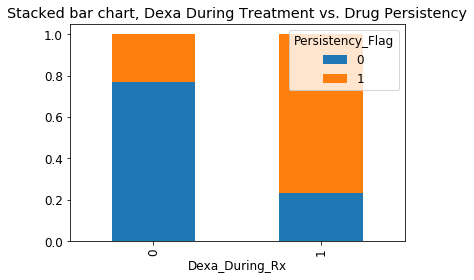

In [232]:
#This bar chart is being printed individually for inclusion in the Business Users report
table = pd.crosstab(health['Dexa_During_Rx'], health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, Dexa During Treatment vs. Drug Persistency')
print(health['Dexa_During_Rx'].value_counts())
   

In [233]:
#examine correlations between variables in the dataset
health.corr()

,Persistency_Flag,AAmericanRace_Flag,AsianRace_Flag,Age_Category,Midwest_Flag,Ntm_Speciality_MyBuckets2,ChangedTScore_Unk,ChangedTScore_Improved,Change_RiskSeg_Unk,Change_RiskSeg_Improved,...,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Estrogen_Deficiency,Risk_Immobilization,Count_Of_Risks
Persistency_Flag,1.000000,-0.021154,0.036541,0.002805,-0.088015,-0.066920,-0.180535,0.112934,-0.084896,0.035594,...,0.098045,0.049158,0.018537,-0.009920,0.079782,-0.045277,-0.040138,-0.012155,-0.049787,0.082210
AAmericanRace_Flag,-0.021154,1.000000,-0.026790,-0.016486,-0.001347,0.018208,-0.030595,-0.017500,-0.044186,-0.013585,...,0.014252,-0.000208,-0.012281,-0.002670,0.041326,-0.002528,0.001811,-0.009590,-0.010824,0.021520
AsianRace_Flag,0.036541,-0.026790,1.000000,-0.037978,-0.068982,-0.029431,-0.021791,-0.026645,-0.018550,-0.012753,...,-0.013523,-0.024854,-0.011529,-0.000521,0.007047,-0.022241,0.004857,-0.009003,-0.010161,-0.022620
Age_Category,0.002805,-0.016486,-0.037978,1.000000,-0.005312,-0.047660,0.040718,-0.028225,-0.119674,0.022643,...,-0.009383,-0.007832,-0.040078,-0.031092,0.000195,0.037975,0.013259,-0.018288,0.032778,-0.024084
Midwest_Flag,-0.088015,-0.001347,-0.068982,-0.005312,1.000000,0.042977,0.059205,-0.025381,0.033311,-0.014050,...,-0.112895,0.050436,-0.002226,-0.005215,-0.107008,0.001161,-0.026051,0.037412,0.021875,-0.104502
Ntm_Speciality_MyBuckets2,-0.066920,0.018208,-0.029431,-0.047660,0.042977,1.000000,-0.038862,0.038559,-0.028051,0.046200,...,0.023155,0.011125,-0.013491,-0.020681,0.008247,0.025526,0.009041,0.046999,0.039131,0.017396
ChangedTScore_Unk,-0.180535,-0.030595,-0.021791,0.040718,0.059205,-0.038862,1.000000,-0.148085,0.645355,-0.070878,...,-0.032487,-0.047029,-0.007081,-0.028685,-0.086367,-0.068954,-0.043753,0.033197,0.008111,-0.120745
ChangedTScore_Improved,0.112934,-0.017500,-0.026645,-0.028225,-0.025381,0.038559,-0.148085,1.000000,-0.049472,0.411522,...,0.028907,0.010891,-0.012214,-0.018723,0.014622,-0.009875,0.014977,-0.009538,0.017244,0.035083
Change_RiskSeg_Unk,-0.084896,-0.044186,-0.018550,-0.119674,0.033311,-0.028051,0.645355,-0.049472,1.000000,-0.109829,...,-0.014487,-0.064039,-0.014556,-0.013035,-0.110428,-0.079872,-0.051388,0.030740,0.008508,-0.143176
Change_RiskSeg_Improved,0.035594,-0.013585,-0.012753,0.022643,-0.014050,0.046200,-0.070878,0.411522,-0.109829,1.000000,...,0.008064,0.031655,-0.005846,-0.008962,-0.003744,-0.019600,0.067810,-0.004565,-0.005153,0.022475


In [234]:
#create heatmap plots showing correlation - features are divided into 3 subsets to make the heatmaps easier to view with persistency_flag included in all

features1 = ['Persistency_Flag','Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx', 'Risk_Segment_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 
            'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
            'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 
            'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 
            'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias']

features2 = ['Persistency_Flag', 'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm', 
            'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics', 
            'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones', 
            'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 
            'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism']

features3 =['Persistency_Flag','Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',  'Risk_Low_Calcium_Intake', 
            'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 
            'Dexa_Freq_During_Rx_Bucket_Flag','Change_RiskSeg_Worsened','Change_RiskSeg_Improved', 'Change_RiskSeg_Unk' , 'ChangedTScore_Worsened', 
            'ChangedTScore_Improved', 'ChangedTScore_Unk', 'AsianRace_Flag',  'Midwest_Flag', 'Ntm_Speciality_MyBuckets1', 'Ntm_Speciality_MyBuckets2' ]



features_Imp = ['Persistency_Flag', 'Dexa_During_Rx','Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 
            'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Gluco_Record_During_Rx','Ntm_Speciality_MyBuckets1', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
                'ChangedTScore_Unk']




(19.0, 0.0)

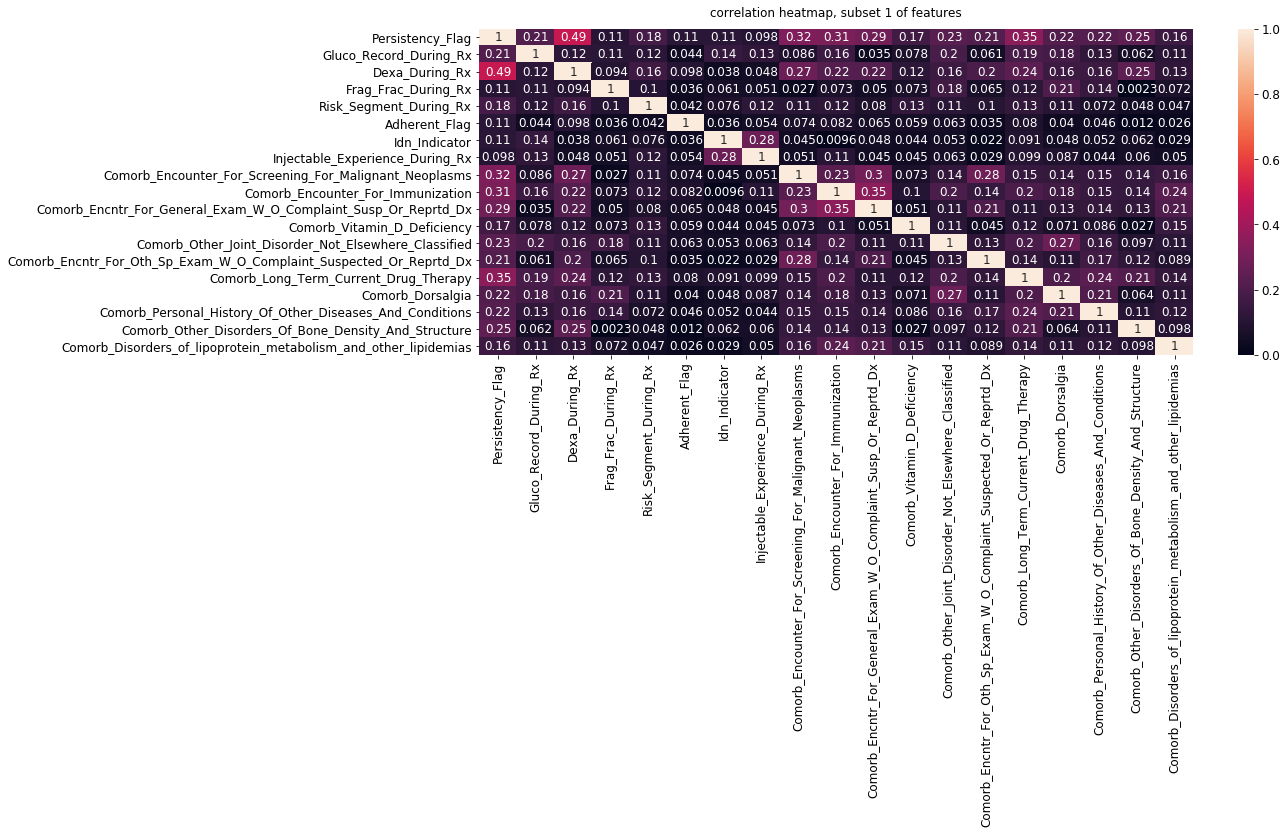

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot first subset
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features1].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 1 of features", fontdict= {'fontsize' :12}, pad = 12)

bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

(17.0, 0.0)

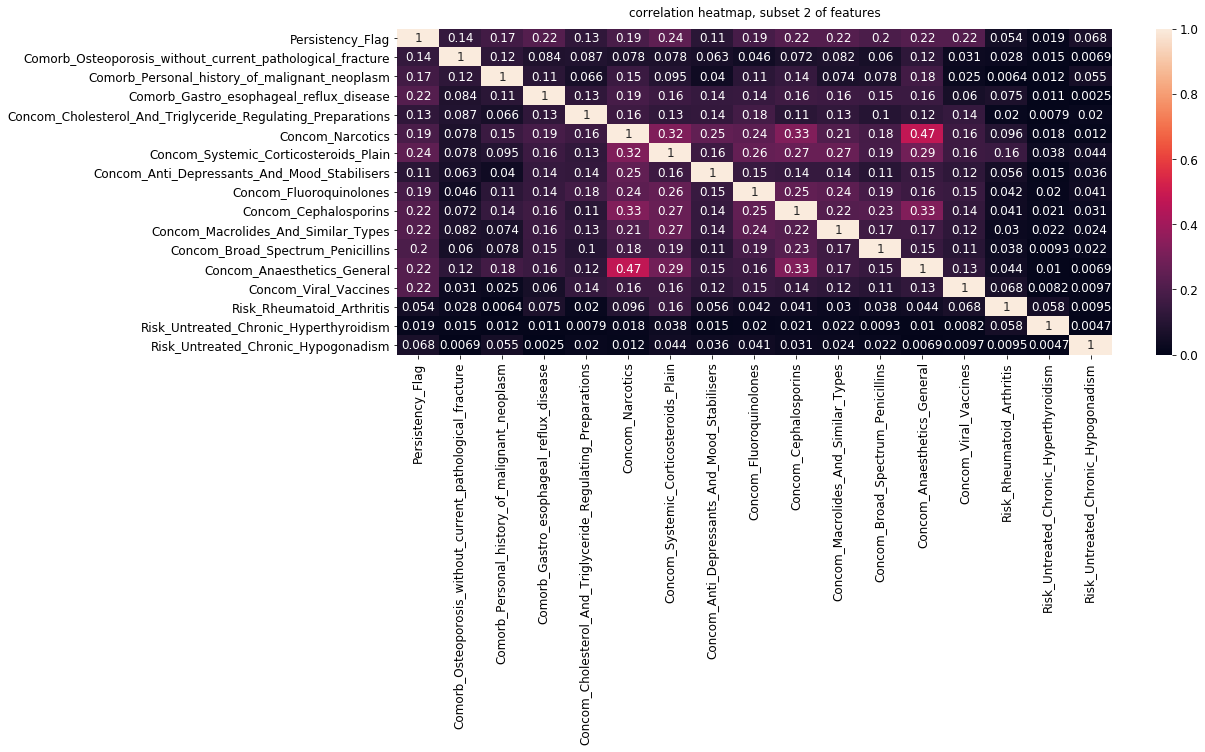

In [236]:
#plot second subset

plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features2].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 2 of features", fontdict= {'fontsize' :12}, pad = 12)

bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

(21.0, 0.0)

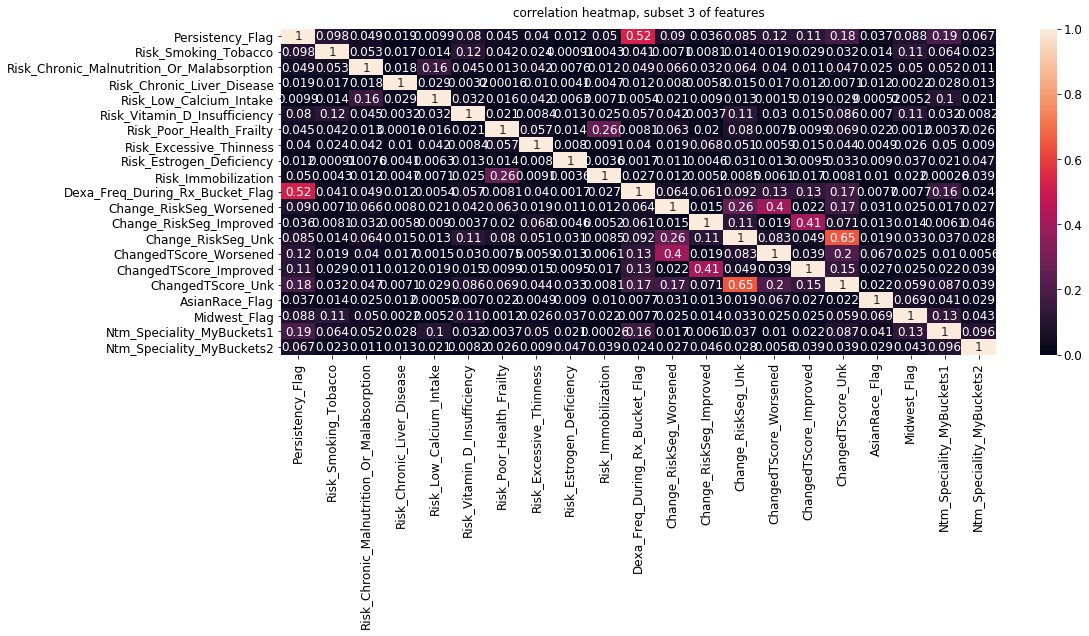

In [237]:
#plot third subset of features 
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(abs(health[features3].corr()), vmin = 0, vmax = 1, annot = True)
heatmap.set_title("correlation heatmap, subset 3 of features", fontdict= {'fontsize' :12}, pad = 12)

bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1, 'correlation heatmap for Important Features')

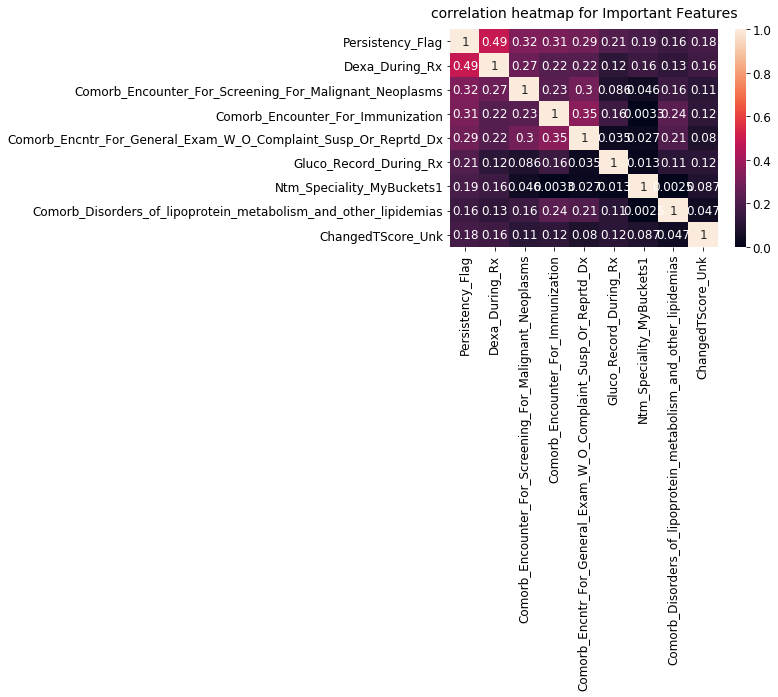

In [238]:
#create heatmap for important features (due to correlation with Persistency_Flag)
heatmap = sns.heatmap(abs(health[features_Imp].corr()), vmin = 0, vmax = 1, annot = True)


bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap.set_title("correlation heatmap for Important Features", fontdict= {'fontsize' :14}, pad = 12)



In [239]:
### Begin Model Building and assessment of models #######
##########################################################

In [240]:
#Logistic Regression model from sciKit-Learn
# import the sklearn package for use in log regression, import confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score




#set up the predictor and target variables
X = health[features]
y = health.Persistency_Flag

# instantiate the model for logistic regression (sklearn)
logreg = LogisticRegression()

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=48)

# fit the model with data - now on the transformed variables
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

#results
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))




[[462  53]
 [ 95 246]]
Accuracy:  0.83


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [241]:
import pandas as pd
confuse = pd.DataFrame(
    confusion_matrix,
    index=['true:no', 'true:yes'], 
    columns=['pred:no', 'pred:yes']
)
print(confuse)

          pred:no  pred:yes
true:no       462        53
true:yes       95       246


No Skill: ROC AUC=0.5000
Logistic: ROC AUC=0.8950


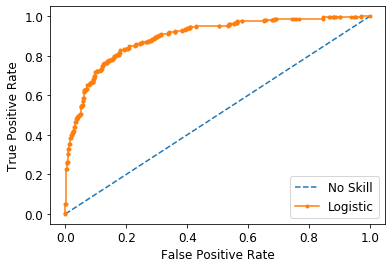

In [242]:
#ROC curve for Log Reg
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lg_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lg_auc = roc_auc_score(y_test, lg_probs)
# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('Logistic: ROC AUC=%.4f' % (lg_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lg_fpr,lg_tpr, _ = roc_curve(y_test, lg_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
from sklearn.metrics import roc_curve
plt.show()

In [243]:
#try log reg with statsmodels and look at summary
import statsmodels.api as sm  
X_train_C = sm.add_constant(X_train)   #statsmodels requires a constant to be added 
lm_2 = sm.OLS(y_train, X_train_C).fit()
lm_2.summary()


/Users/jen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Persistency_Flag   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     39.16
Date:                Sat, 18 Dec 2021   Prob (F-statistic):          7.57e-285
Time:                        16:16:35   Log-Likelihood:                -999.88
No. Observations:                2568   AIC:                             2108.
Df Residuals:                    2514   BIC:                             2424.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                  0.6092      0.079      7.698      0.000       0.454       0.764
Gluco_Record_During_Rx                                                 0.0367      0.028      1.293      0.196      -0.019       0.092
Dexa_During_Rx                                                        -0.1959      0.063     -3.096      0.002      -0.320      -0.072
Frag_Frac_During_Rx                                                   -0.0029      0.024     -0.122      0.903      -0.049       0.044
Risk_Segment_During_Rx                                                -0.0134      0.010     -1.319      0.187      -0.033       0.007
Adherent_Flag                                                         -0.0522      0.034     -1.535      0.125      -0.119       0.014
Idn_Indicator                                                          0.0482      0.018      2.627      0.009       0.012       0.084
Injectable_Experience_During_Rx                                       -0.0005      0.024     -0.022      0.983      -0.048       0.047
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                 0.0843      0.016      5.261      0.000       0.053       0.116
Comorb_Encounter_For_Immunization                                      0.0592      0.017      3.527      0.000       0.026       0.092
Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx         0.0755      0.016      4.578      0.000       0.043       0.108
Comorb_Vitamin_D_Deficiency                                            0.0935      0.023      4.110      0.000       0.049       0.138
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                   0.0428      0.017      2.459      0.014       0.009       0.077
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx     0.0410      0.018      2.220      0.027       0.005       0.077
Comorb_Long_Term_Current_Drug_Therapy                                  0.1450      0.019      7.451      0.000       0.107       0.183
Comorb_Dorsalgia                                                       0.0626      0.019      3.293      0.001       0.025       0.100
Comorb_Personal_History_Of_Other_Diseases_And_Conditions               0.0393      0.020      2.013      0.044       0.001       0.078
Comorb_Other_Disorders_Of_Bone_Density_And_Structure                   0.1059      0.024      4.442      0.000       0.059       0.153
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias        0.0059      0.017      0.343      0.731      -0.028       0.040
Comorb_Osteoporosis_without_current_pathological_fracture             -0.0388      0.019     -2.041      0.041   

In [244]:
#Using the Gradient Boosting Classifier from SKlearn

from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score




cl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
cl.fit(X_train, y_train)

# prediction on test set
y_pred=cl.predict(X_test)


# Model Accuracy and ROC AUC:
print("Accuracy:",round (metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 0.82


No Skill: ROC AUC=0.5000
Gradient Boosting Classifier: ROC AUC=0.8940


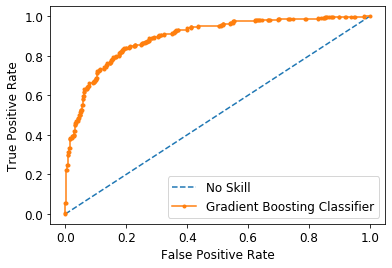

In [245]:
#create ROC curve for gradient Boosting Classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
cl_probs = cl.predict_proba(X_test)
# keep probabilities for the positive outcome only
cl_probs = cl_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
cl_auc = roc_auc_score(y_test, cl_probs)
# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('Gradient Boosting Classifier: ROC AUC=%.4f' % (cl_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
cl_fpr, cl_tpr, _ = roc_curve(y_test, cl_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(cl_fpr, cl_tpr, marker='.', label='Gradient Boosting Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [246]:
#Fit a Decision Tree model as comparison
# Load Library
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Classf = DecisionTreeClassifier()
Classf.fit(X_train, y_train)
y_pred = Classf.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred),2))


Accuracy:  0.75


No Skill: ROC AUC=0.5000
DecisionTree: ROC AUC=0.7406


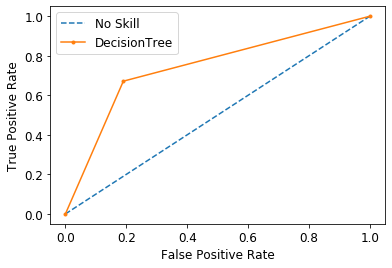

In [247]:
# create ROC curve for Decision Tree 

from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
dt_probs = Classf.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('DecisionTree: ROC AUC=%.4f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [248]:
from sklearn.ensemble import AdaBoostClassifier

# Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
Classf = AdaBoostClassifier(n_estimators=100)
Classf.fit(X_train, y_train)
y_pred = Classf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8235981308411215

No Skill: ROC AUC=0.5000
AdaBoost: ROC AUC=0.8938


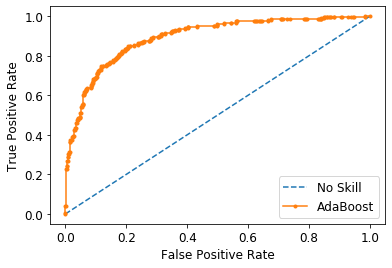

In [249]:
# create ROC curve for AdaBoostClassifier

from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
dt_probs = Classf.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('AdaBoost: ROC AUC=%.4f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='AdaBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [250]:
#Fit a Random Forest model as comparison
# Load Library
from sklearn.ensemble import RandomForestClassifier


#Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by about 7%
Classf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=48)
Classf.fit(X_train, y_train)
y_pred = Classf.predict(X_test)


print("Accuracy: ", round(accuracy_score(y_test, y_pred),2))



Accuracy:  0.81


No Skill: ROC AUC=0.5000
RandomForest: ROC AUC=0.8880


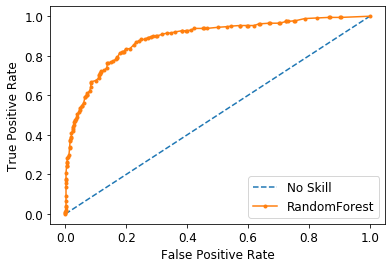

In [251]:
# create ROC curve for Random FOrest

from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
dt_probs = Classf.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.4f' % (ns_auc))
print('RandomForest: ROC AUC=%.4f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [207]:
#The models are all comparable with the exception of Decision Tree which is inferior in terms of accuracy as well as ROC AUC. 
#We will select the logistic regression model since it permits understanding of the target variable in 
#terms of linear relationships with the predictor variables.  